<a href="https://colab.research.google.com/github/AraiKensuke/AIiRPS/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------
[0 1 2 3 6 7]
[4 5]
------
[1 2 3 4 5 7]
[0 6]
------
[0 1 3 4 5 6]
[2 7]
------
[0 2 4 5 6 7]
[1 3]


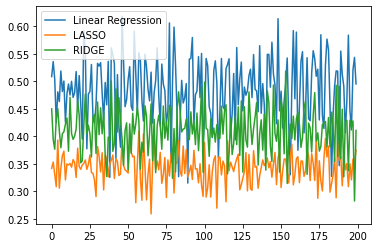

In [7]:
import numpy as np
import matplotlib.pyplot as _plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor

####  some plug-and-play regression algorithms
clf  = LinearRegression()
las  = Lasso()
ridg = Ridge()

X, y = datasets.load_diabetes(return_X_y=True)

rkf = RepeatedKFold(n_splits=4, n_repeats=1)   #  2 different realizations of 4-fold
datinds = np.arange(8)

###   Let's take a look at what 4-fold split looks like.  Using data 
for train, test in rkf.split(datinds):
    print("------")
    print(train)
    print(test)

###  Examples using regression.  cross_val_score fits data on training data (generated by rkf), 
###  and returns score on prediction of test data (generated by rkf)
rkf = RepeatedKFold(n_splits=4, n_repeats=50)
scoresLR = cross_val_score(clf,  X, y, cv=rkf)
scoresLA = cross_val_score(las,  X, y, cv=rkf)
scoresRD = cross_val_score(ridg, X, y, cv=rkf)

_plt.plot(scoresLR, label="Linear Regression")
_plt.plot(scoresLA, label="LASSO")
_plt.plot(scoresRD, label="RIDGE")
_plt.legend()

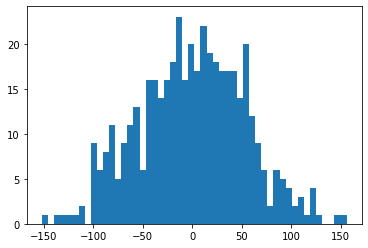

In [5]:
###  Take a look - are the residuals gaussian-like?  Just use all data here, to see if we need to do a transformation or not.
clf.fit(X, y)
yP = clf.predict(X)
#  residuals
out = _plt.hist(yP - y, bins=50)